# Perception of begin old

Analysis of a dataset taken from https://github.com/tomeru/sideProjects/tree/master/feelingOld, data collected by Tomer Ullman

...

### import modules

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

/home/brain/.conda/envs/abbildungen/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/brain/.conda/envs/abbildungen/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


### load data

In [59]:
dataset = '../data/feelingOld.csv'

In [60]:
dataset

'../data/feelingOld.csv'

### ...

In [61]:
age_df = pd.read_csv('../data/feelingOld.csv')
age_df.tail()

,Consent,ageFeel,oldBegin,oldReally,age,gender,numChild
190,"Yes, I am at least 18 years of age, have read ...",5,50,80,23,female,1
191,"Yes, I am at least 18 years of age, have read ...",4,50,60,49,male,2
192,"Yes, I am at least 18 years of age, have read ...",3,70,100,55,female,5
193,"Yes, I am at least 18 years of age, have read ...",5,69,80,69,male,3
194,"Yes, I am at least 18 years of age, have read ...",5,40,60,41,male,0


In [78]:
age_df.Consent.unique()

array(['Yes, I am at least 18 years of age, have read and understand the explanation provided to me and voluntarily agree to participate in this survey.'],
      dtype=object)

In [77]:
sns.set_context('talk')
sns.set_style('ticks')
sns.set_color_codes('muted')

age_df.gender.unique()

index = 0
for gen in age_df.gender:
    if len(gen) < 6:
        age_df.gender[index] = 'male'
    else:
        age_df.gender[index] = 'female'
    index += 1
    
age_df.gender.unique()      
            


/home/brain/.conda/envs/abbildungen/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/home/brain/.conda/envs/abbildungen/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


array(['Yes, I am at least 18 years of age, have read and understand the explanation provided to me and voluntarily agree to participate in this survey.'],
      dtype=object)

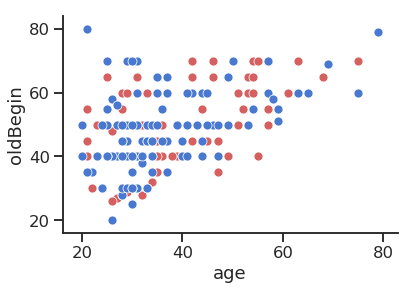

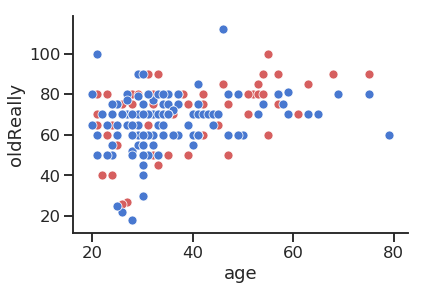

In [67]:
female = age_df[age_df.gender == 'female']
male = age_df[age_df.gender == 'male']

sns.scatterplot(data=female, x='age', y='oldBegin', color='r')
sns.scatterplot(data=male, x='age', y='oldBegin', color='b')
sns.despine()
plt.show()

sns.scatterplot(data=female, x='age', y='oldReally', color='r')
sns.scatterplot(data=male, x='age', y='oldReally', color='b')
sns.despine()
plt.show()

/home/brain/.conda/envs/abbildungen/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


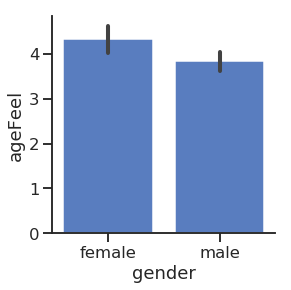

In [71]:
fig, ax = plt.subplots(1, 1, figsize=(4,4))
sns.barplot(x="gender", y='ageFeel', data=age_df, ax=ax, color="b")
sns.despine()
plt.show()

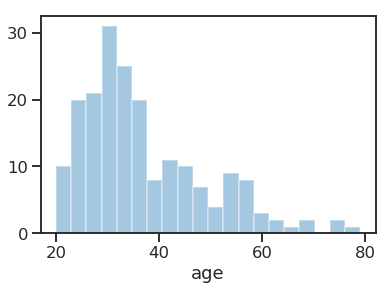

In [86]:
sns.distplot( age_df.loc[:,'age'],kde=False,bins=20)

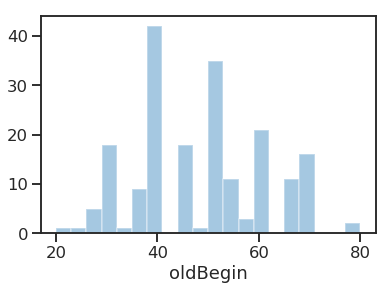

In [87]:
sns.distplot( age_df.loc[:,'oldBegin'],kde=False,bins=20)

/home/brain/.conda/envs/abbildungen/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


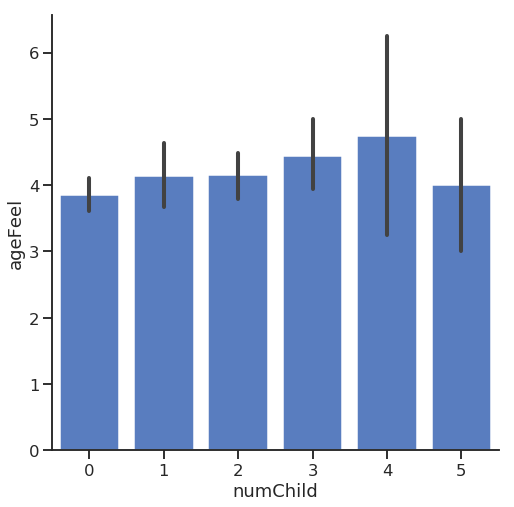

In [80]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
hist()
sns.despine()
plt.show()

/home/brain/.conda/envs/abbildungen/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


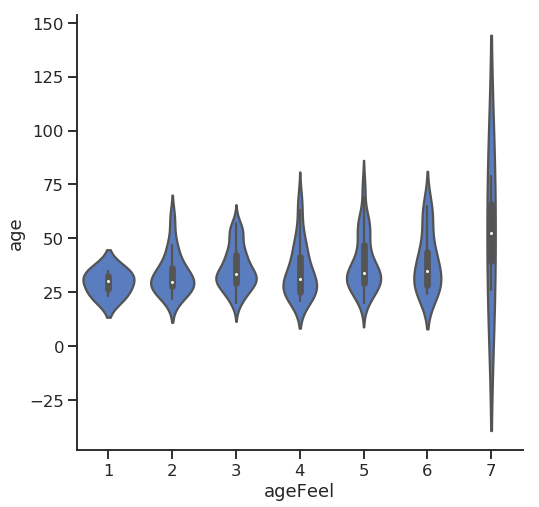

In [75]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
sns.violinplot(x="ageFeel", y='age', data=age_df, ax=ax, color="b")
sns.despine()
plt.show()